<a href="https://colab.research.google.com/github/NanzibaBasnin/HCI-Integrated-Gesture-Recognition/blob/main/aug_cnn_lstm_stand_hg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from google.colab import drive
#import zipfile
drive.mount('/content/gdrive')
#zip_ref = zipfile.ZipFile('/content/gdrive/My Drive/handgesture.zip', 'r')
#zip_ref.extractall("/tmp")
#zip_ref.close()
#!unzip leapGestRecog.zip
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


Using TensorFlow backend.


In [ ]:
num_classes = 10
img_rows, img_cols = 50, 50
batch_size = 16

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = './gdrive/My Drive/HG_new/train'
validation_data_dir = './gdrive/My Drive/HG_new/test'

In [ ]:
# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 7001 images belonging to 10 classes.
Found 3003 images belonging to 10 classes.


In [ ]:
from keras.layers import TimeDistributed
from keras.layers import LSTM, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras import optimizers


model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(200))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# We use a very small learning rate
sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])





# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0        

In [ ]:
rom keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("./gdrive/My Drive/cnn_lstm_hg_aug.h5",
                             monitor="val_acc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_acc',
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True,
                          mode="max")

reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.1, patience = 7, verbose = 1, min_delta = 1e-4, mode="max")

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate
# we put our call backs into a callback list
#callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate
sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

nb_train_samples = 7000
nb_validation_samples = 3000
epochs = 100

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples /16,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples /16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





438/437 [==============================] - 3050s 7s/step - loss: 2.3018 - acc: 0.1045 - val_loss: 2.2960 - val_acc: 0.1407

Epoch 00001: val_acc improved from -inf to 0.14067, saving model to ./gdrive/My Drive/cnn_lstm_stand_aug.h5
Epoch 2/100
438/437 [==============================] - 258s 590ms/step - loss: 2.2892 - acc: 0.1146 - val_loss: 2.2687 - val_acc: 0.1700

Epoch 00002: val_acc improved from 0.14067 to 0.17000, saving model to ./gdrive/My Drive/cnn_lstm_stand_aug.h5
Epoch 3/100
438/437 [==============================] - 246s 561ms/step - loss: 2.2573 - acc: 0.1473 - val_loss: 2.1935 - val_acc: 0.1773

Epoch 00003: val_acc improved from 0.17000 to 0.17733, saving model to ./gdrive/My Drive/cnn_lstm_stand_aug.h5
Epoch 4/100
438/437 [==============================] - 257s 587ms/step - loss: 2.1641 - acc: 0.1839 - val_loss: 2.0389 - val_acc: 0.2183

Epoch 00004: val_a

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[295   0   1   0   0   1   3   0   0   0]
 [  2 292   3   1   0   2   0   0   0   0]
 [  0   0 294   0   1   0   0   0   1   4]
 [  0   0  16 283   0   0   0   0   1   0]
 [  0   0   0   0 300   0   0   0   0   0]
 [  0   0   0   0   0 300   0   0   0   0]
 [  0   0   0   0   0   0 300   0   0   0]
 [  0   0   0   0   0   1   0 294   3   2]
 [  0   0   0   0   0   0   0   2 298   0]
 [  0   0   0   0   0   0   0   0   0 300]]
Classification Report
              precision    recall  f1-score   support

          01       0.99      0.98      0.99       300
          02       1.00      0.97      0.99       300
          03       0.94      0.98      0.96       300
          04       1.00      0.94      0.97       300
          05       1.00      1.00      1.00       300
          06       0.99      1.00      0.99       300
          07       0.99      1.00      1.00       300
          08       0.99      0.98      0.99       300
          09       0.98      0.99      0.99

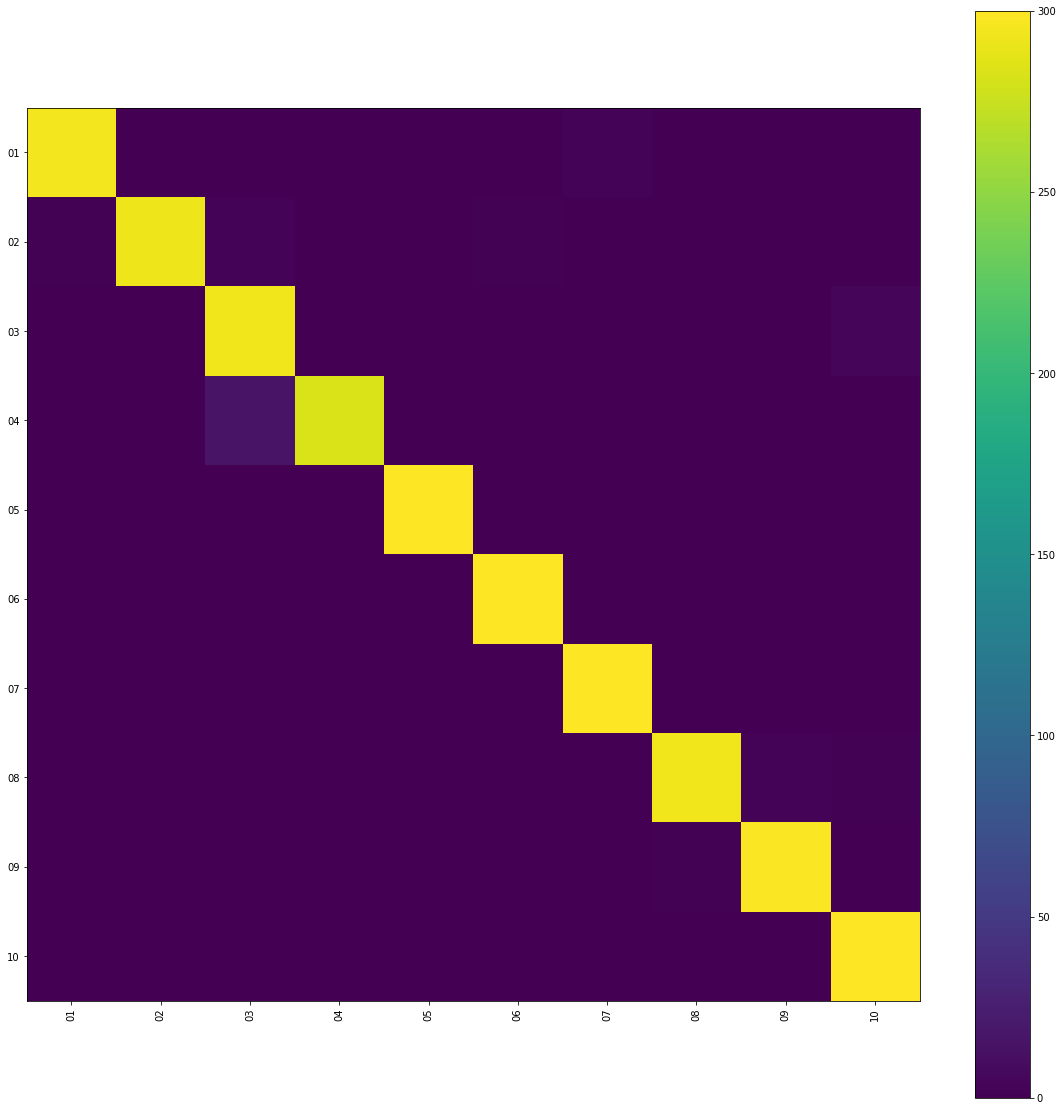

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('./gdrive/My Drive/cnn_lstm_stand_aug.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 7000
nb_validation_samples = 3000

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

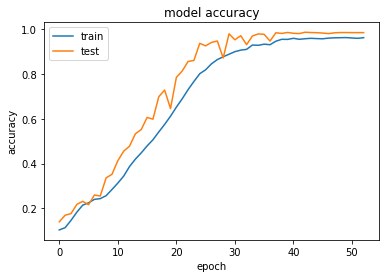

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

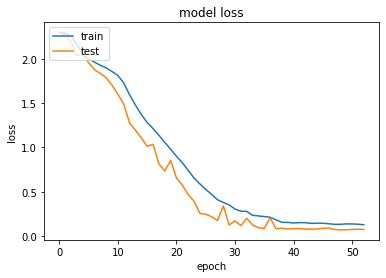

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
cm1 = np.array([[295,   0,   1  , 0 ,  0  , 1,   3,   0,   0 ,  0],
                [  2, 292,   3,   1,   0,   2,   0,   0,   0,   0],
                [  0 ,  0 ,294 ,  0 ,  1,   0,   0,   0 ,  1 ,  4],
                [  0,   0,  16, 283,   0 ,  0,   0 ,  0 ,  1 ,  0],
                [  0 ,  0,   0,   0 ,300,   0,   0,   0,   0,   0],
                [  0 ,  0,   0,   0,   0 ,300 ,  0 ,  0 ,  0,   0],
                [  0,   0,   0,  0   ,0 ,  0, 300,   0,   0,   0],
                [  0 ,  0,   0,   0 ,  0,   1,   0 ,294 ,  3,   2],
                [  0  , 0 ,  0 ,  0 ,  0 ,  0  , 0,   2 ,298,   0],
                [  0  , 0,   0 ,  0 ,  0 ,  0,   0,   0,   0 ,300]])

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

In [ ]:
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

In [ ]:
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

In [ ]:
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [ ]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm1):9.3f} {recall(label, cm1):6.3f}")
print("precision total:", precision_macro_average(cm1))
print("recall total:", recall_macro_average(cm1))

label precision recall
    0     0.993  0.983
    1     1.000  0.973
    2     0.936  0.980
    3     0.996  0.943
    4     0.997  1.000
    5     0.987  1.000
    6     0.990  1.000
    7     0.993  0.980
    8     0.983  0.993
    9     0.980  1.000
precision total: 0.9856803204958414
recall total: 0.9853333333333334


In [ ]:
fmeasure1 = (2 * precision_macro_average(cm1) * recall_macro_average(cm1)) / (precision_macro_average(cm1) + recall_macro_average(cm1))
print("fmeasure: ", fmeasure1)
print("Accuracy: " , accuracy(cm1))
print("########################")

fmeasure:  0.9855067963719042
Accuracy:  0.9853333333333333
########################


In [ ]:
model = load_model('./gdrive/My Drive/cnn_lstm_stand_aug.h5')
test_loss, test_acc = modetest_loss, test_acc = model.evaluate(validation_generator)

#print('Test accuracy: {:2.2f}%'.format(test_acc*100))l.evaluate(validation_generator)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

188/188 [==============================] - 27s 143ms/step
Test accuracy: 98.53%


In [ ]:
score = model.evaluate(validation_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

188/188 [==============================] - 27s 144ms/step
Test loss: 0.0774126907788838
Test accuracy: 0.9853333333333333


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 3000 images belonging to 10 classes.


In [ ]:
score = model.evaluate(validation_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3000/3000 [==============================] - 47s 16ms/step
Test loss: 0.07741269341572843
Test accuracy: 0.9853333333333333
